# Tensorflow 1

## MNIST with one-hot encoding

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import random
import numpy as np

2025-02-18 14:11:18.380928: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-18 14:11:18.381494: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-18 14:11:18.385101: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-18 14:11:18.393838: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739905878.408344 1214800 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739905878.41

In [2]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# Reshape and normalize data
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

In [5]:
y_train.shape

(60000, 10)

In [6]:
y_train = y_train.reshape(-1,10,1)
y_test = y_test.reshape(-1,10,1)

In [7]:
# Create a simple model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28,)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='sigmoid')
])
model.predict(x_test[100:101])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

2025-02-18 14:11:21.821625: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[0.52476597, 0.5007099 , 0.49949467, 0.47518966, 0.571275  ,
        0.508649  , 0.43997902, 0.5245913 , 0.5135103 , 0.36615583]],
      dtype=float32)

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.MSE,metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=512, validation_split=0.1)

Epoch 1/25


2025-02-18 14:16:06.132150: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: INVALID_ARGUMENT: Incompatible shapes: [512] vs. [512,10]
	 [[{{function_node __inference_one_step_on_data_62129}}{{node compile_loss/mean_squared_error/sub}}]]


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/mean_squared_error/sub defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/pewhite/.asdf/installs/python/3.11.9/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/home/pewhite/.asdf/installs/python/3.11.9/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/home/pewhite/.asdf/installs/python/3.11.9/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3077, in run_cell

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3132, in _run_cell

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3336, in run_cell_async

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3519, in run_ast_nodes

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code

  File "/tmp/ipykernel_1214800/1825210629.py", line 6, in <module>

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 60, in train_step

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/keras/src/trainers/trainer.py", line 383, in _compute_loss

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/keras/src/trainers/trainer.py", line 351, in compute_loss

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/keras/src/trainers/compile_utils.py", line 691, in __call__

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/keras/src/trainers/compile_utils.py", line 700, in call

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/keras/src/losses/loss.py", line 67, in __call__

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/keras/src/losses/losses.py", line 33, in call

  File "/home/pewhite/github/aet-cs/aet-cs.github.io/white/ML/tf-env/lib/python3.11/site-packages/keras/src/losses/losses.py", line 1679, in mean_squared_error

Incompatible shapes: [512] vs. [512,10]
	 [[{{node compile_loss/mean_squared_error/sub}}]] [Op:__inference_multi_step_on_iterator_62170]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


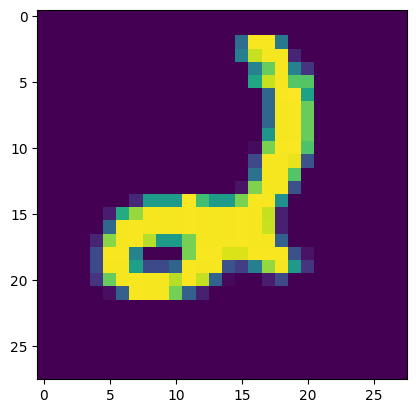

In [10]:
i = random.randint(0,x_test.shape[0])
print(np.round(model.predict(x_test[i:i+1])), y_test[i].T)
plt.imshow(x_test[i]);

In [11]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.0062


0.00538151990622282

In [12]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test_pred = y_test.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_pred,y_pred)

0.9705

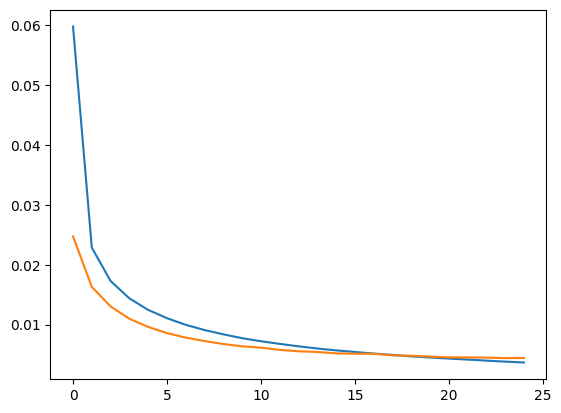

In [14]:
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);

## MNIST with sparse encoding

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import random
import numpy as np

In [16]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
# Reshape and normalize data
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255.0

In [18]:
y_train[100]

np.uint8(5)

In [46]:
# Create a simple model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28,)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.predict(x_test[100:101])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[0.09158631, 0.0894543 , 0.0650287 , 0.0846299 , 0.09706046,
        0.12959613, 0.11865865, 0.15108654, 0.10555672, 0.06734232]],
      dtype=float32)

In [48]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=512, validation_split=0.1)

Epoch 1/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9961 - loss: 0.0207 - val_accuracy: 0.9782 - val_loss: 0.0754
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9966 - loss: 0.0184 - val_accuracy: 0.9800 - val_loss: 0.0738
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9973 - loss: 0.0158 - val_accuracy: 0.9807 - val_loss: 0.0726
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9980 - loss: 0.0137 - val_accuracy: 0.9797 - val_loss: 0.0748
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9979 - loss: 0.0134 - val_accuracy: 0.9807 - val_loss: 0.0747
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9982 - loss: 0.0117 - val_accuracy: 0.9788 - val_loss: 0.0778
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9983 - loss: 0.0109 - val_accuracy: 0.9795 - val_loss: 0.0786
Epoch 8/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9988 - loss: 0.0096 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
7 7


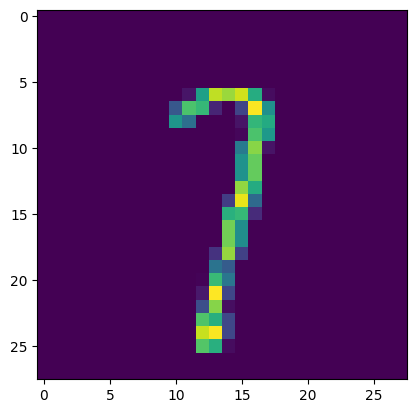

In [49]:
i = random.randint(0,x_test.shape[0])
print(np.argmax(model.predict(x_test[i:i+1])), y_test[i].T)
plt.imshow(x_test[i]);

In [50]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9751 - loss: 0.1025 


[0.08748152107000351, 0.9782999753952026]

In [51]:
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step


In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9783

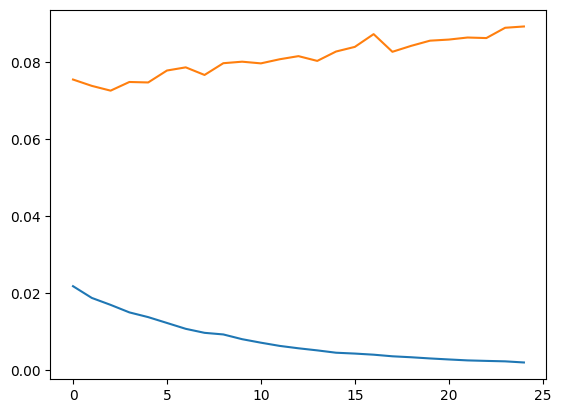

In [53]:
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);

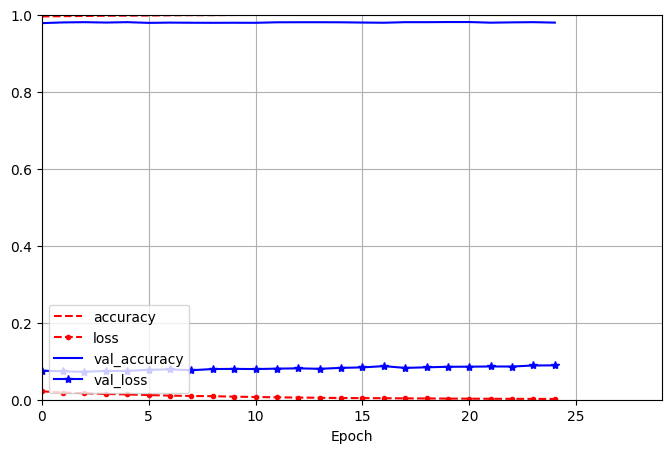

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()